# EDA and Visualization

This notebook will cover the basic EDA and visulization including the following packages.

*   matplotlib
*   seaborn
*   Pandas Profiling
*   AutoViz
*   geographic data with Basemap


## Load Data

In [1]:
#Load data from boston 
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
boston = load_boston()
df = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])
df['MEDV'] = boston['target']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [0]:
#print(boston.DESCR)

### Variable Recoding

In [0]:
#create a new variable. one means the MEDV is larger than the mean
mean_MEDV = round(df.mean(axis=0)[-1],2)
df['FlagMEDV'] = np.where(df['MEDV']> mean_MEDV, '1', '0')

### Data Subsetting

In [0]:
df[df['FlagMEDV']=='0'].head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,FlagMEDV
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,0
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5,0
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9,0
10,0.22489,12.5,7.87,0.0,0.524,6.377,94.3,6.3467,5.0,311.0,15.2,392.52,20.45,15.0,0
11,0.11747,12.5,7.87,0.0,0.524,6.009,82.9,6.2267,5.0,311.0,15.2,396.90,13.27,18.9,0


In [0]:
df[(df['FlagMEDV']=='0') & (df['CRIM']< 0.4)].head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,FlagMEDV
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,0
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5,0
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9,0
10,0.22489,12.5,7.87,0.0,0.524,6.377,94.3,6.3467,5.0,311.0,15.2,392.52,20.45,15.0,0
11,0.11747,12.5,7.87,0.0,0.524,6.009,82.9,6.2267,5.0,311.0,15.2,396.90,13.27,18.9,0


In [0]:
df[(df['AGE']>= 50) | (df['CRIM']<=5)].head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,FlagMEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,1
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,1


In [0]:
df[(df.FlagMEDV != '0') & (df.DIS <= 4)].head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,FlagMEDV
38,0.17505,0.0,5.96,0.0,0.499,5.966,30.2,3.8473,5.0,279.0,19.2,393.43,10.13,24.7,1
88,0.05660,0.0,3.41,0.0,0.489,7.007,86.3,3.4217,2.0,270.0,17.8,396.90,5.50,23.6,1
89,0.05302,0.0,3.41,0.0,0.489,7.079,63.1,3.4145,2.0,270.0,17.8,396.06,5.70,28.7,1
90,0.04684,0.0,3.41,0.0,0.489,6.417,66.1,3.0923,2.0,270.0,17.8,392.18,8.81,22.6,1
92,0.04203,28.0,15.04,0.0,0.464,6.442,53.6,3.6659,4.0,270.0,18.2,395.01,8.16,22.9,1


In [0]:
df[(df.FlagMEDV =='1') & (df['CHAS'] > 0.069)].head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,FlagMEDV
160,1.27346,0.0,19.58,1.0,0.605,6.250,92.6,1.7984,5.0,403.0,14.7,338.92,5.50,27.0,1
162,1.83377,0.0,19.58,1.0,0.605,7.802,98.2,2.0407,5.0,403.0,14.7,389.61,1.92,50.0,1
163,1.51902,0.0,19.58,1.0,0.605,8.375,93.9,2.1620,5.0,403.0,14.7,388.45,3.32,50.0,1
208,0.13587,0.0,10.59,1.0,0.489,6.064,59.1,4.2392,4.0,277.0,18.6,381.32,14.66,24.4,1
216,0.04560,0.0,13.89,1.0,0.550,5.888,56.0,3.1121,5.0,276.0,16.4,392.80,13.51,23.3,1


### Groupby & Aggregate function

In [0]:
df.groupby('FlagMEDV').describe()

CRIM                                ...  MEDV                  
          count      mean        std      min  ...   25%   50%   75%   max
FlagMEDV                                       ...                        
0         297.0  5.563153  10.668584  0.01096  ...  13.9  18.0  20.3  22.5
1         209.0  0.842998   2.125546  0.00632  ...  24.0  27.9  34.6  50.0

[2 rows x 112 columns]

In [0]:
df.groupby('FlagMEDV').agg([np.mean, np.std, np.median])

CRIM                      ...       MEDV                 
              mean        std   median  ...       mean       std median
FlagMEDV                                ...                            
0         5.563153  10.668584  0.84054  ...  16.870370  4.233162   18.0
1         0.842998   2.125546  0.10469  ...  30.579426  8.308060   27.9

[2 rows x 42 columns]

### Standardization

#### MinMax Scaler

This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

The transformation is given by:
<pre><code>X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_scaled = X_std * (max - min) + min</code></pre>
where min, max = feature_range.
The transformation is calculated as:

<pre><code>X_scaled = scale * X + min - X.min(axis=0) * scale
where scale = (max - min) / (X.max(axis=0) - X.min(axis=0))</code></pre>
This transformation is often used as an alternative to zero mean, unit variance scaling.

In [0]:
from sklearn import preprocessing

In [0]:
x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_mmstd = pd.DataFrame(x_scaled, columns=df.columns)
df_mmstd.drop('FlagMEDV', axis=1,inplace=True)
df_mmstd.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.040544,0.113636,0.391378,0.069170,0.349167,0.521869,0.676364,0.242381,0.371713,0.422208,0.622929,0.898568,0.301409,0.389618
std,0.096679,0.233225,0.251479,0.253994,0.238431,0.134627,0.289896,0.191482,0.378576,0.321636,0.230313,0.230205,0.197049,0.204380
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000851,0.000000,0.173387,0.000000,0.131687,0.445392,0.433831,0.088259,0.130435,0.175573,0.510638,0.945730,0.144040,0.267222
50%,0.002812,0.000000,0.338343,0.000000,0.314815,0.507281,0.768280,0.188949,0.173913,0.272901,0.686170,0.986232,0.265728,0.360000
75%,0.041258,0.125000,0.646628,0.000000,0.491770,0.586798,0.938980,0.369088,1.000000,0.914122,0.808511,0.998298,0.420116,0.444444
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Z-score Methods


In [0]:
from scipy.stats import zscore
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols].apply(zscore)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147,-0.014454
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850,-0.210362
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048,0.148802
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302,-0.057989


## **Matplotlib**



In [0]:
%matplotlib inline 
import matplotlib.pyplot as plt

### Simple Line Plot

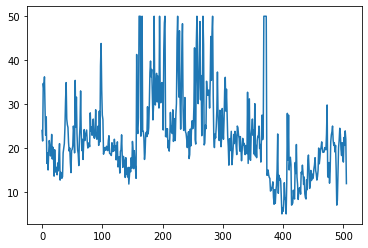

In [0]:
plt.plot(df.MEDV)

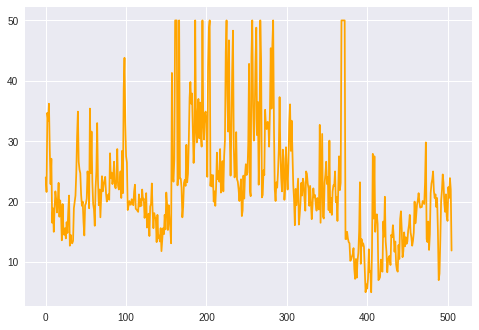

In [0]:
plt.plot(df.MEDV, color="orange")

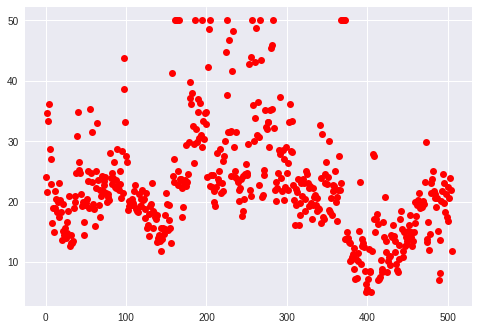

In [0]:
plt.plot(df.index, df.MEDV, 'o', color="red")

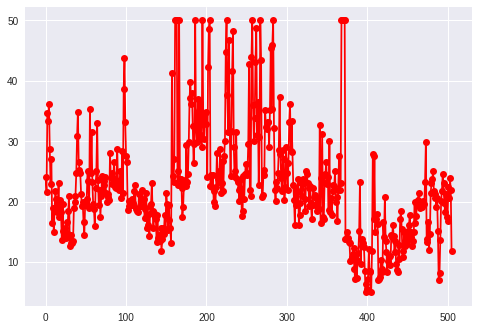

In [0]:
plt.plot(df.index, df.MEDV, '-o', color="red")

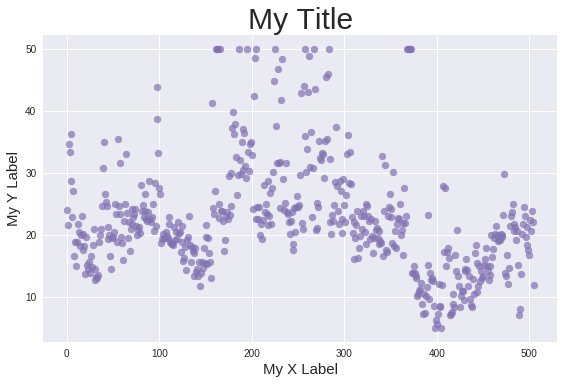

In [0]:
# making plots from the documentation

fig, ax = plt.subplots()
ax.scatter(df.index, df.MEDV, c='m',  alpha=0.7)
# alpha is the transparency, c is the color,

ax.set_xlabel("My X Label", fontsize=15)
ax.set_ylabel("My Y Label", fontsize=15)
ax.set_title('My Title', fontsize=30)

# ax.grid(True)
fig.tight_layout()

plt.show()

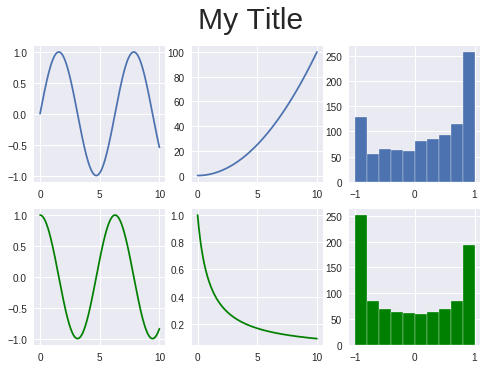

In [0]:
# nest two plots
# making plots from the documentation
# link: https://towardsdatascience.com/plot-organization-in-matplotlib-your-one-stop-guide-if-you-are-reading-this-it-is-probably-f79c2dcbc801
# Synthetic Data
time = np.linspace(0, 10, 1000)
height = np.sin(time)
weight = np.cos(time)
# Plotting all the subplots
fig, axes = plt.subplots(2, 3)

# add a main title - make sure you run this first!
fig.suptitle('My Title', fontsize=30)

axes[0, 0].plot(time, height)
axes[0, 1].plot(time, time**2)
axes[0, 2].hist(height)
axes[1, 0].plot(time, weight, color='green')
axes[1, 1].plot(time, 1/(time+1), color='green')
axes[1, 2].hist(weight, color='green')

# tight_layout may move some axes
#plt.tight_layout()

#fig.savefig('figures/figureAxesSubplots.png')
plt.show()

In [0]:
# more plot options for markers
# link: https://jakevdp.github.io/PythonDataScienceHandbook/04.02-simple-scatter-plots.html

"""
Here are some nice options:

'o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd'
"""

In [0]:
# more plot options for colors
# link: https://matplotlib.org/2.0.2/api/colors_api.html

"""
Here are some nice options:

b: blue
g: green
r: red
c: cyan
m: magenta
y: yellow
k: black
w: white
"""

### Scatter Plot

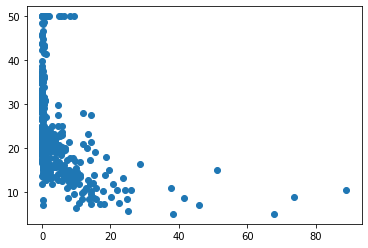

In [0]:
plt.scatter(df.CRIM, df.MEDV)

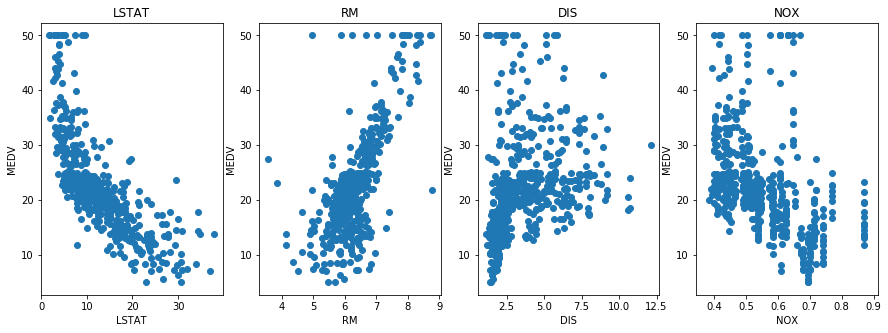

In [0]:
#More plots at once
plt.figure(figsize=(15, 5))

features = ['LSTAT', 'RM','DIS','NOX']
target = df['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

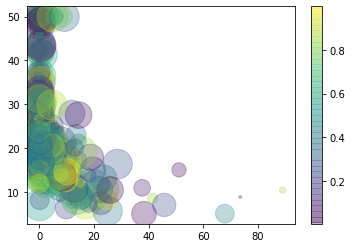

In [0]:
#Changing size, color, and transparency in scatter plots
rng =np.random.RandomState(0)
colors = rng.rand(506)
size = 1000* rng.rand(100)
plt.scatter(df.CRIM, df.MEDV, c=colors, s =size, alpha=0.3, cmap='viridis')
plt.colorbar()

### Basic Errorbars

<ErrorbarContainer object of 3 artists>

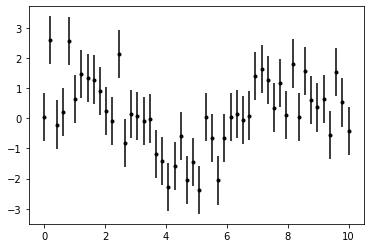

In [0]:
x = np.linspace(0, 10, 50) 
dy=0.8
y = np.sin(x) + dy * np.random.randn(50)
plt.errorbar(x, y, yerr=dy, fmt='.k')

### Save plots

In [0]:
# Save the plots, then you can access the file on your right hand side
# Another way to do it, just right click the plots and select save images...
plt.savefig('fancy.png')

<Figure size 432x288 with 0 Axes>

## **Seaborn**

In [0]:
import seaborn as sns

### Histograms and Kernel density estimates (KDE)

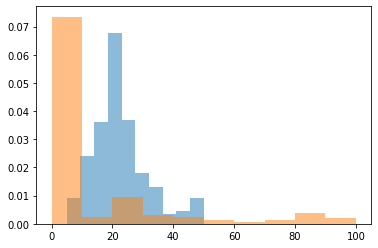

In [0]:
for col in ['MEDV','ZN']:
  plt.hist(df[col], density=True, alpha=0.5)

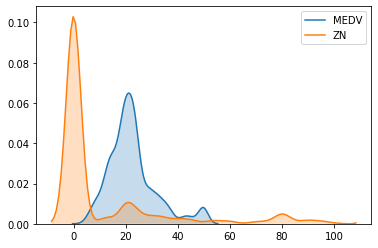

In [0]:
for col in ['MEDV','ZN']:
  sns.kdeplot(df[col],shade=True)

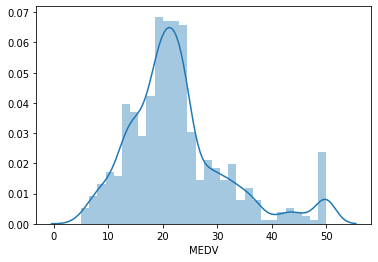

In [0]:
sns.distplot(df['MEDV'], bins=30)
plt.show()

### Pair Plot

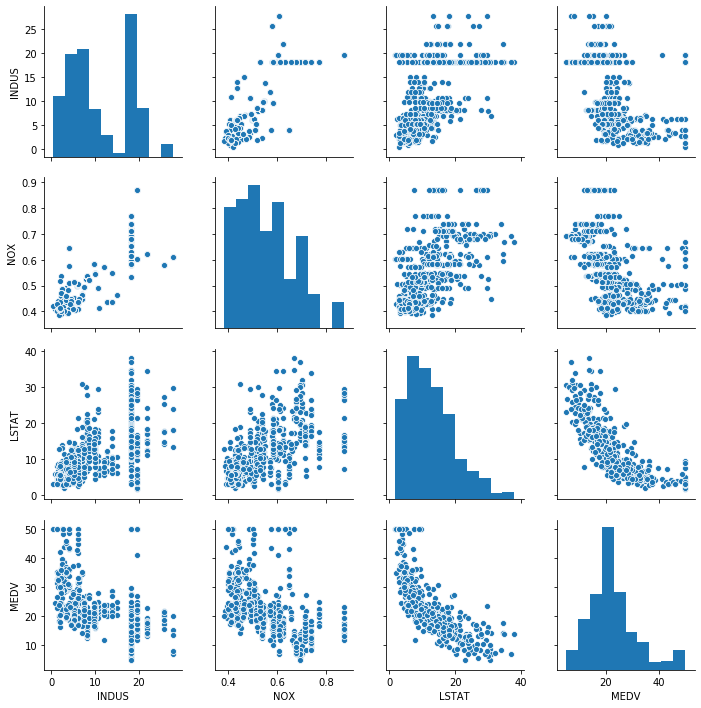

In [0]:
sns.pairplot(df[['INDUS','NOX','LSTAT','MEDV']], height=2.5)

### Correlation Matrix

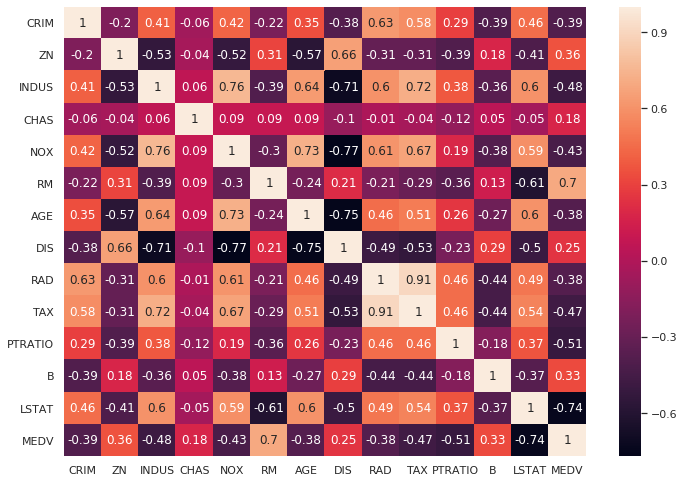

In [0]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
# annot = True to print the values inside the square

### Boxplot 

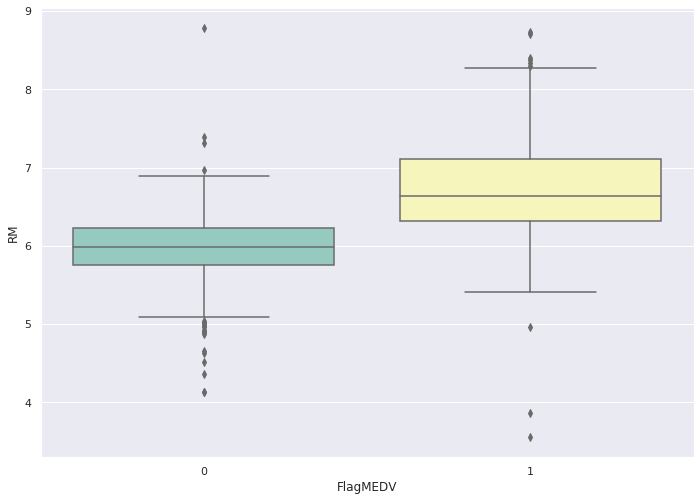

In [0]:
sns.boxplot("FlagMEDV","RM", data=df, palette="Set3")
#sns.swarmplot("FlagMEDV","RM", data=df, color=".25")

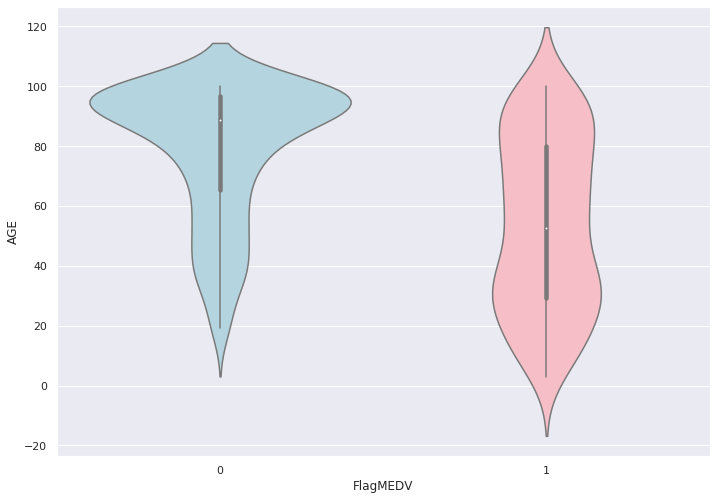

In [0]:
sns.violinplot('FlagMEDV','AGE', data=df, palette=["lightblue","lightpink"])

## Pandas Profiling

In [0]:
from pandas_profiling import ProfileReport

In [0]:
profile = ProfileReport(df)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


In [0]:
profile

Number of variables,15
Number of observations,506
Total Missing (%),0.0%
Total size in memory,59.4 KiB
Average record size in memory,120.3 B
Numeric,12
Categorical,1
Boolean,1
Date,0
Text (Unique),0
Rejected,1


In [0]:
#Save the report
profile.to_file(outputfile='first_report.html')

## AutoViz

In [0]:
!pip install autoviz

In [0]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()

Imported AutoViz_Class version: 0.0.68. Call using: 
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
            
To remove previous versions, perform 'pip uninstall autoviz'


In [0]:
#save dataframe as csv
df.to_csv("/content/boston.csv")

Shape of your Data Set: (506, 16)
Classifying variables in data set...
    16 Predictors classified...
        This does not include the Target column(s)
    1 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 55
Could not draw Distribution Plot
Time to run AutoViz (in seconds) = 8.061


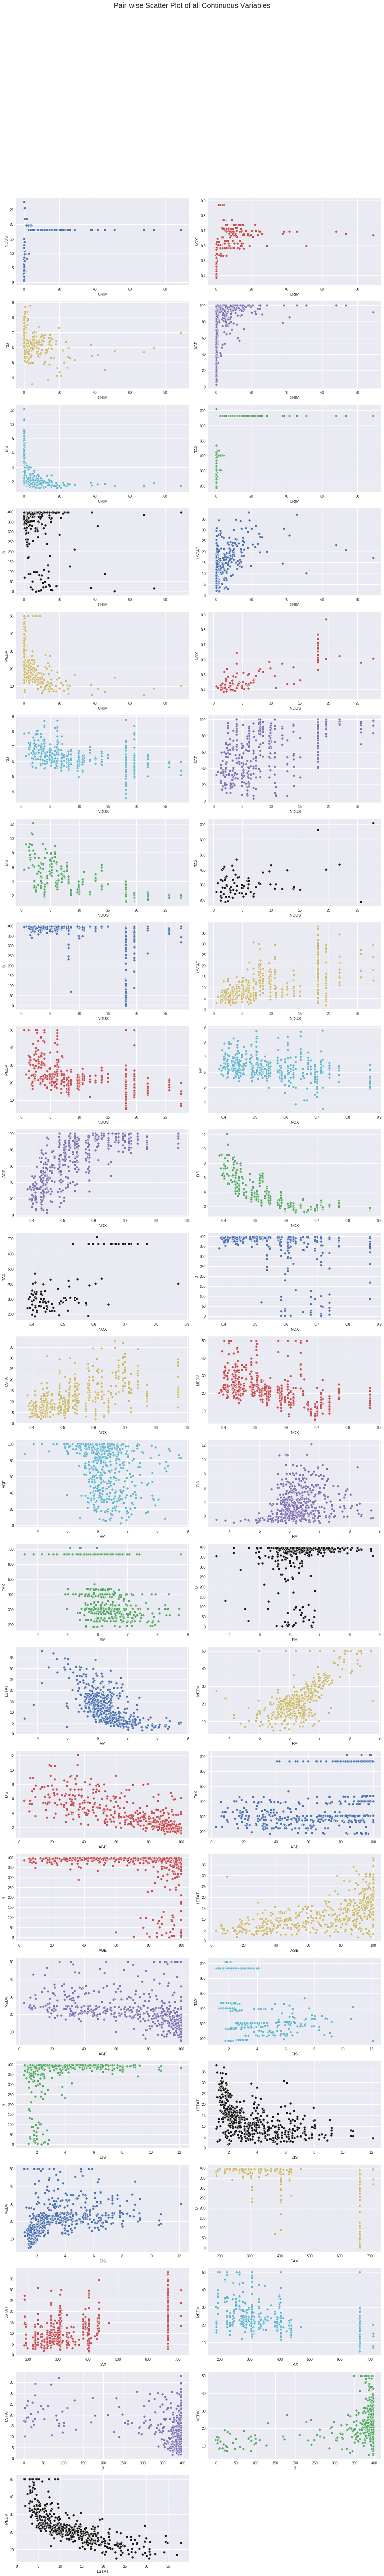

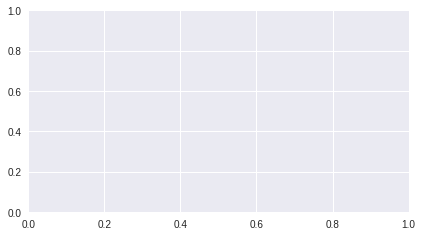

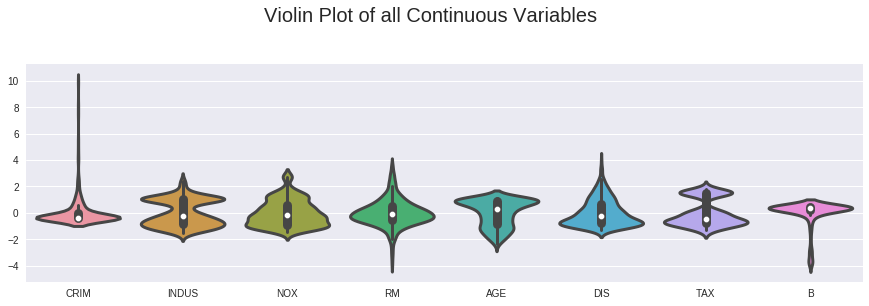

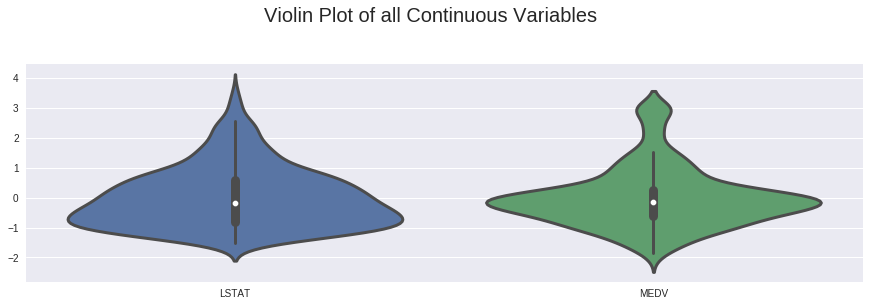

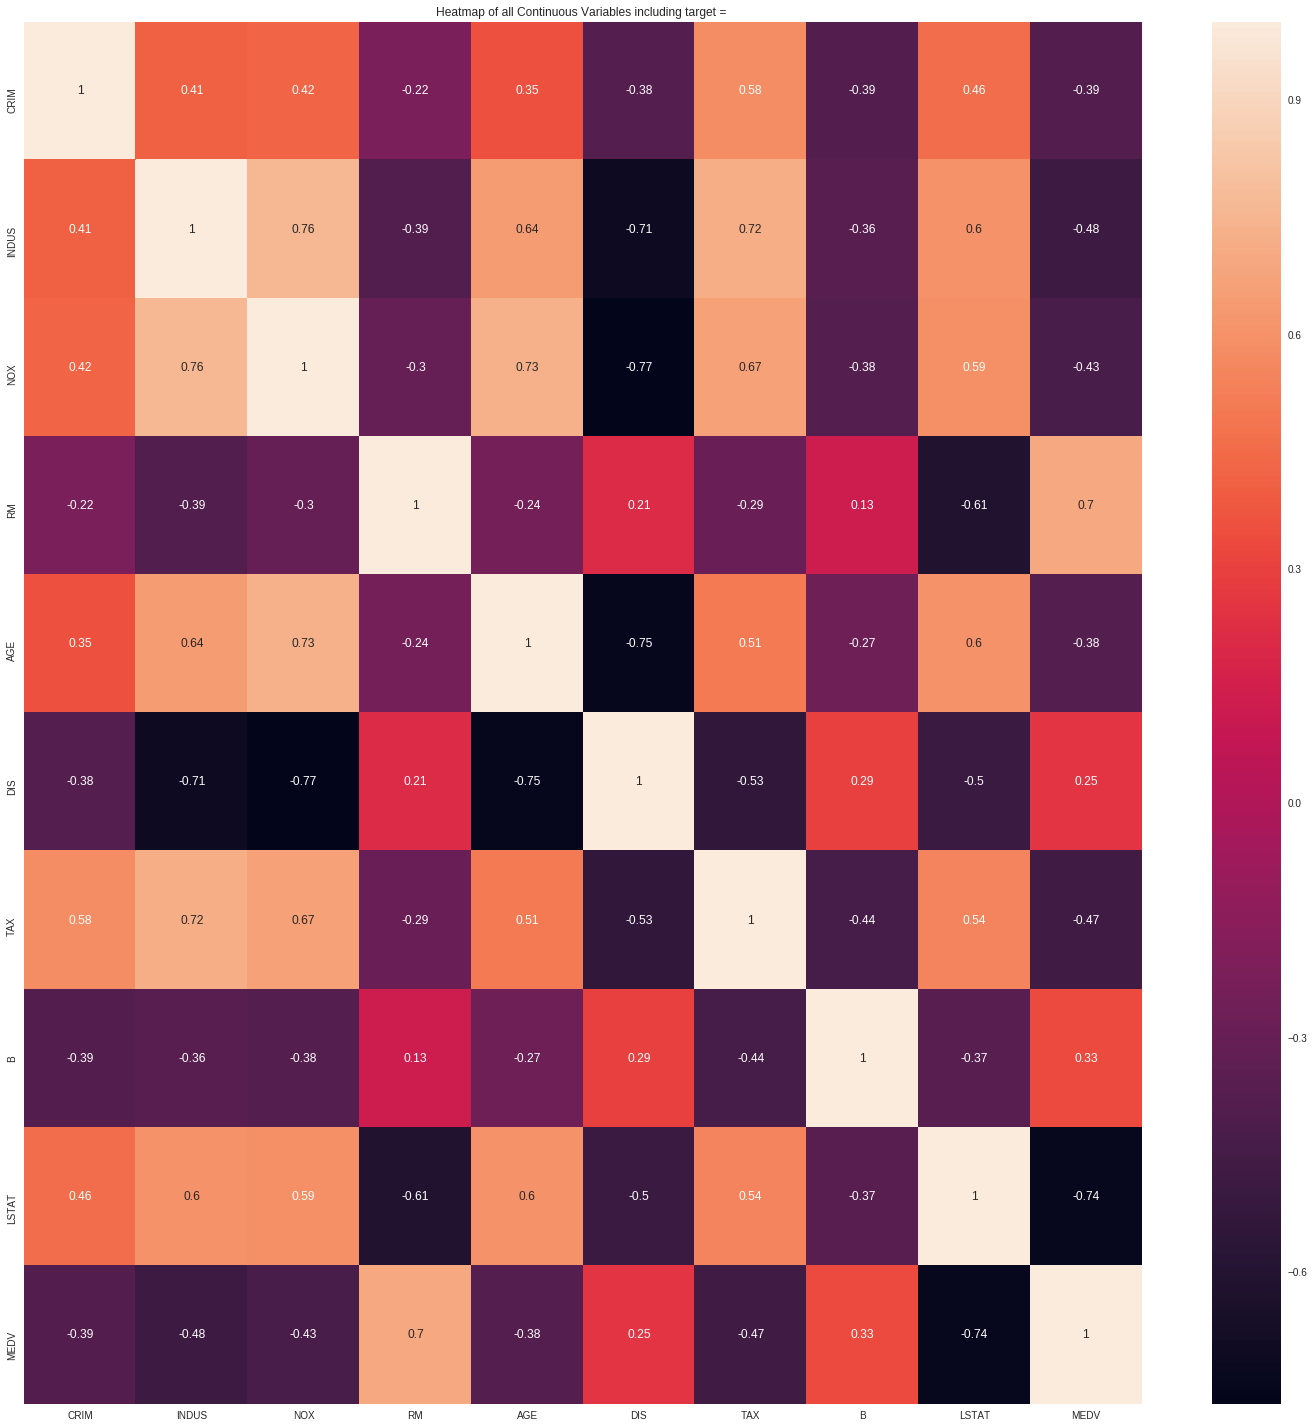

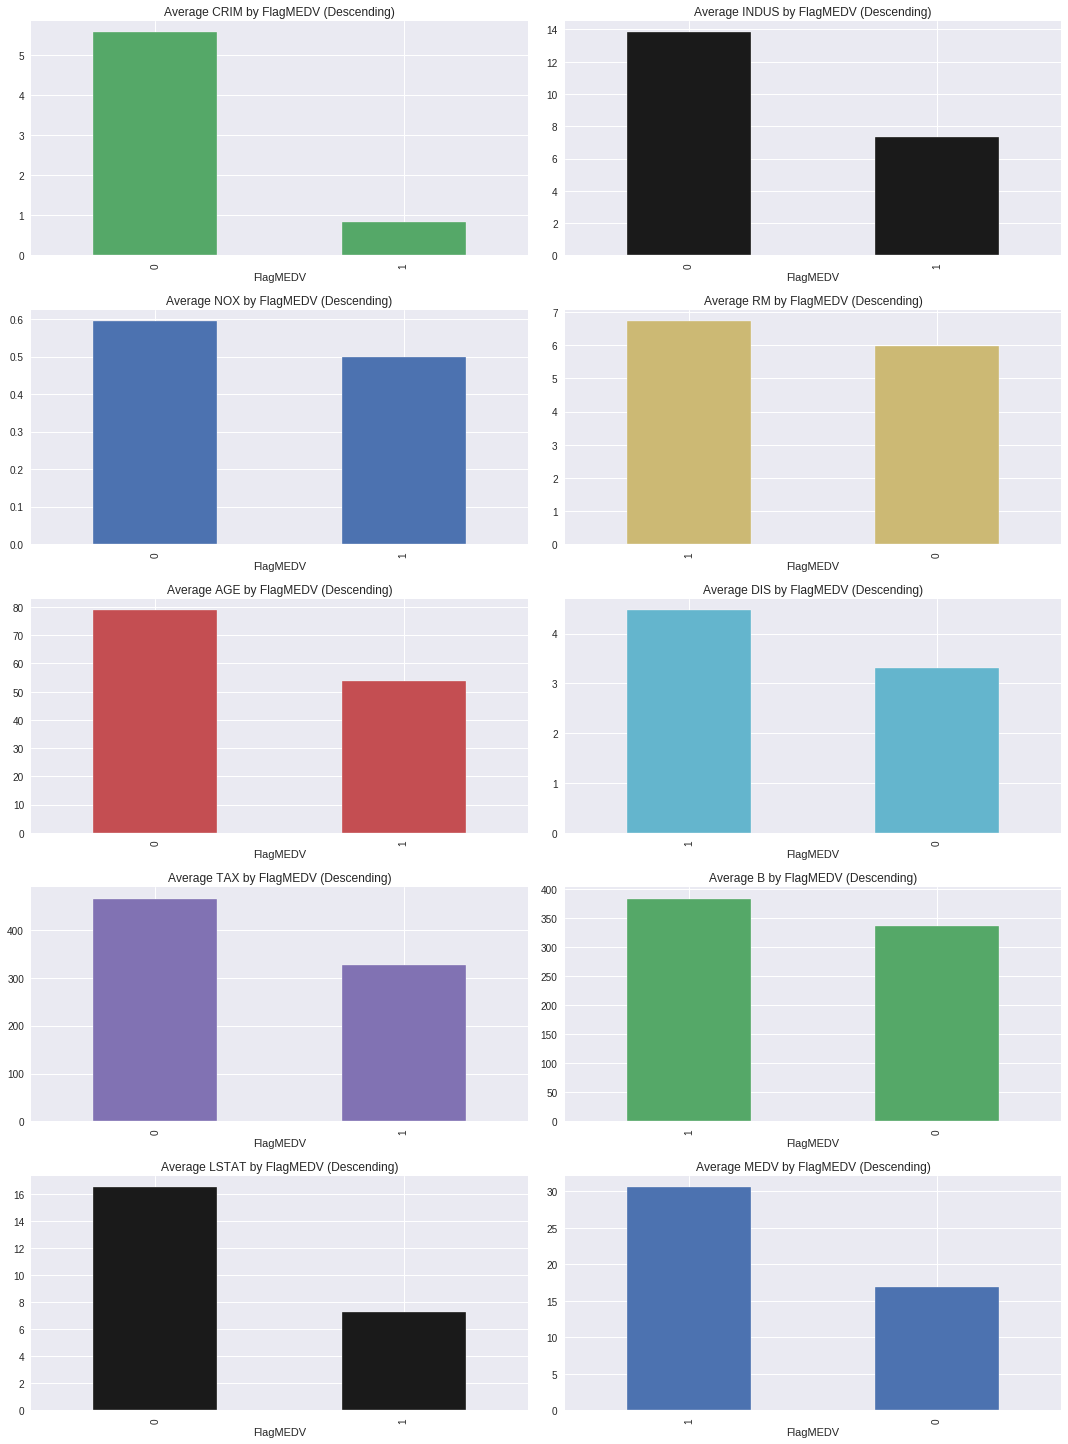

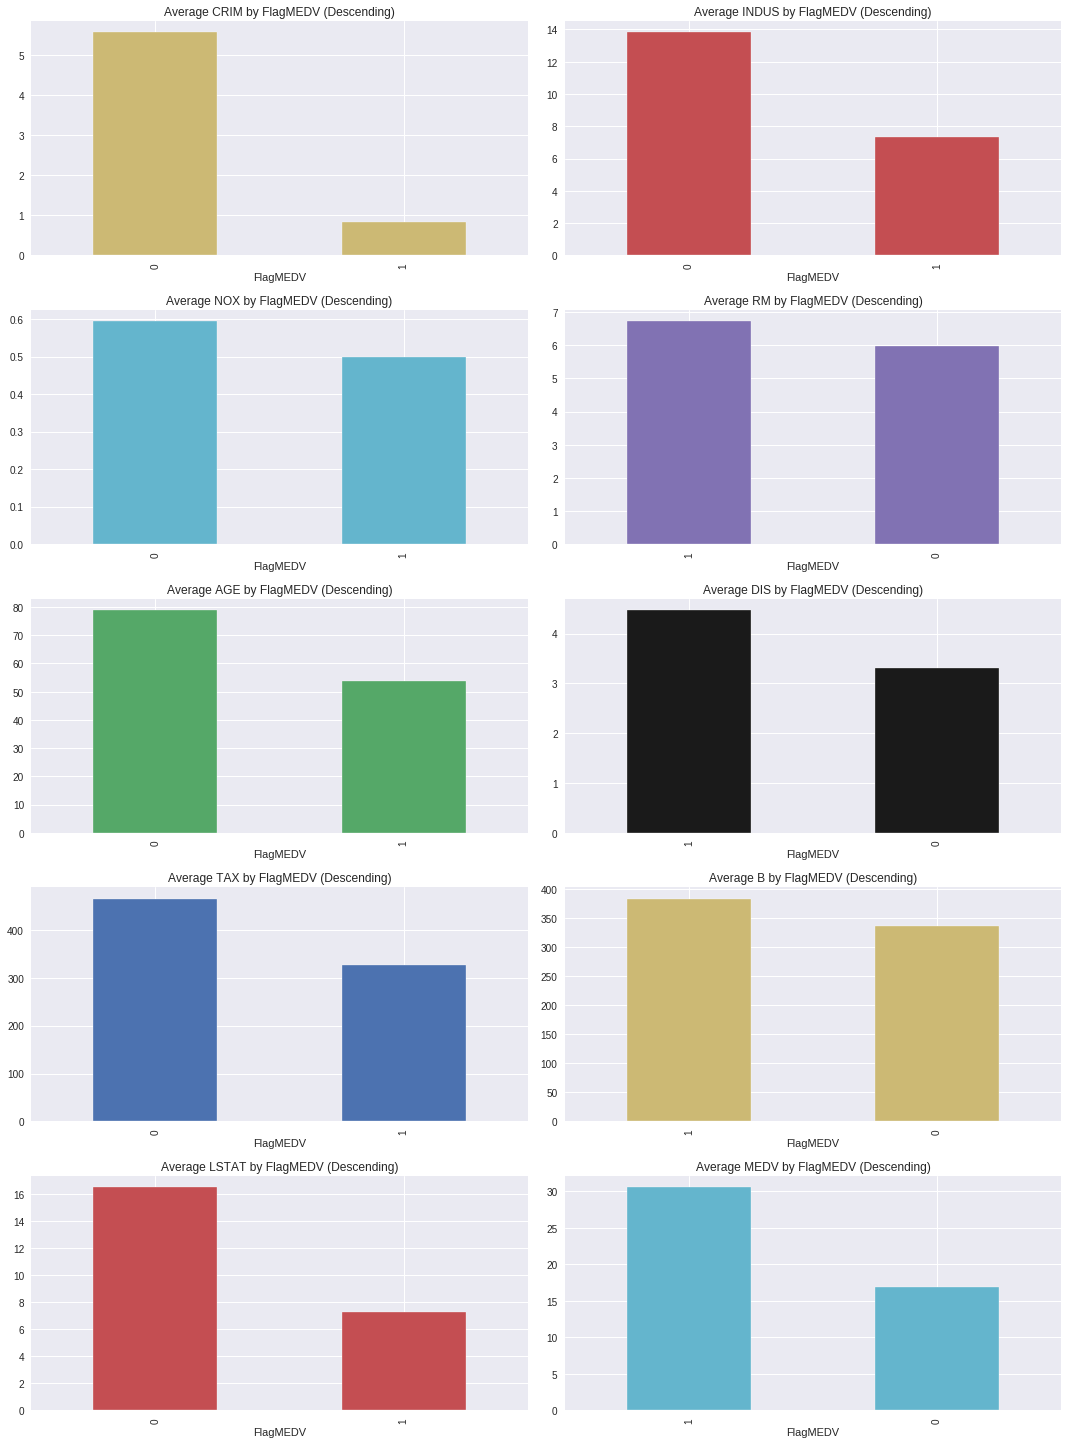

In [0]:
dft = AV.AutoViz("/content/boston.csv")

## Geographic Data with Basemap

https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.13-Geographic-Data-With-Basemap.ipynb#scrollTo=Efd7CIwQHpqy

!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

!pip install pyproj==1.9.6

In [0]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline

ModuleNotFoundError: ignored

In [0]:
cities = pd.read_csv("/content/sample_data/california_housing_train.csv")

In [0]:
cities.head()

In [0]:
lat = cities['latitude'].values
lon = cities['longitude'].values
population = cities['population'].values
income = cities['median_income'].values

In [0]:
# 1. Draw the map background fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h',
            lat_0=37.5, lon_0=-119,
            width=1E6, height=1.2E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')
# 2. scatter city data, with color reflecting population # and size reflecting area
m.scatter(lon, lat, latlon=True,
          c=np.log10(income), s=np.log(population),
          cmap='Reds', alpha=0.5)
# 3. create colorbar and legend
plt.colorbar(label=r'$\log_{10}({\rm population})$')
plt.clim(3, 7)

plt.legend(scatterpoints=1, frameon=False, labelspacing=1, loc='lower left')